<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Configured_Part_Studio_Motion_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Onshape REST API

The main documentation for the REST API can be found at [https://cad.onshape.com/glassworks/#/](https://cad.onshape.com/glassworks/#/)

You can generate API keys from [https://dev-portal.onshape.com/](https://dev-portal.onshape.com/). **Never share API keys and only limit permission scope to what is necessary.**

Additional links to check out:

*   [Onshape Integration Guides](https://github.com/PTC-Education/Onshape-Integration-Guides)
*   [Onshape Developer Documentation](https://onshape-public.github.io/)
*   [Onshape Digital Twins](https://ptc-education.github.io/docs/solutions/onshapedx)





In [16]:
#@title Import and Setup Onshape Client

!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json

#@markdown Chage the base if using an enterprise (i.e. "https://ptc.onshape.com")
base = 'https://cad.onshape.com' #@param {type:"string"}

#@markdown Would you like to import your API keys from a file, or copy and paste them directly?
keyImportOption = "Copy/Paste Keys" #@param ["Upload Keys from File", "Copy/Paste Keys"]

from IPython.display import clear_output 
clear_output()
print("Onshape Client successfully imported!")

if keyImportOption == "Upload Keys from File":
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    execfile(fn)

  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')
else:
  access = input("Paste your Onshape Access Key: ")
  secret = input("Paste your Onshape Secret Key: ")
  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')


Onshape client configured - ready to go!


# Basic snippet examples



In [19]:
#@title Get Parts in Part Studio
#@markdown Funciton `getPartsInPartStudio(url: str)` returns JSON of all parts in a part studio
url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/eb5cf1e9ef047a1c7059bfb5' #@param {type:"string"}
showResponse = False #@param {type:"boolean"}
listParts = True #@param {type:"boolean"}
def getPartsInPartStudio(url: str):
  fixed_url = '/api/parts/d/did/w/wid/e/eid/'

  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  # The command below prints the entire JSON response from Onshape
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed

if showResponse:
  partResponse = getPartsInPartStudio(url)
  print(json.dumps(partResponse, indent=4, sort_keys=True))
if listParts:
  for i in range(len(partResponse)):
    print(partResponse[i]["name"] +" has part ID: "+ partResponse[i]["partId"])
else:
  pass

Upper Leg has part ID: JKD
Lower Leg has part ID: JND


In [ ]:
#@title Get Mass Properties of Parts in a Part Studio
#@markdown Defines funciton `getMassProp(url: str, partId="", config="")`, which returns JSON of mass properties for all parts in a part studio. 
url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/eb5cf1e9ef047a1c7059bfb5' #@param {type:"string"}
#@markdown Leave config blank to use default config, and leave partId blank to get mass props for all parts
config = '' #@param {type:"string"}
partId = '' #@param {type:"string"}
showResponse = True #@param {type:"boolean"}

def getMassProp(url: str, partId="", config=""):
  fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'
  element = OnshapeElement(url)
  method = 'GET'

  params = {}
  if partId != "":
    params['partId'] = partId
  if config != "":
    params['configuration'] = config
    
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v2+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed
if showResponse:
  massProp = getMassProp(url,partId,config)
  print(json.dumps(massProp, indent=4, sort_keys=True))
else:
  pass

# Kinematic Sketch Function

Public Onshape Document with kinematic sketches in part studios
[https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/8cecc26025e1209e8aae2acb](https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/8cecc26025e1209e8aae2acb)

In [23]:
#@title Get Variables from Part Studio
#@markdown Defines function `getVariables(url, config)`, which returns JSON of mass properties for all parts in a part studio

url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/eb5cf1e9ef047a1c7059bfb5' #@param {type:"string"}
config = '' #@param {type:"string"}
showResponse = False #@param {type:"boolean"}

#@markdown **Also defines** function `getVariableValue(url,config,varName)`

#@markdown Input a variable name to get value for that variable.
varName = 'kneeAngle' #@param {type:"string"}

# USING (MODIFIED) CODE FROM https://github.com/onshape-public/onshape-clients/blob/master/python/test/test_get_variables.py

import json

from onshape_client.oas import BTFeatureScriptEvalCall2377
from onshape_client.onshape_url import OnshapeElement
from onshape_client.utility import parse_quantity

script = r'''
    function(context, queries) {
            return getAllVariables(context);
        }
    '''
def getVariables(url, config):
    element = OnshapeElement(url)
    script_call = BTFeatureScriptEvalCall2377(script=script)
    response = client.part_studios_api.eval_feature_script(
        element.did,
        element.wvm,
        element.wvmid,
        element.eid,
        bt_feature_script_eval_call_2377=script_call,
        _preload_content=False,
        configuration=config
    )
    measurements = json.loads(response.data.decode("utf-8"))["result"]["message"]["value"]
    parsed_measurements = parse_variables_from_map(measurements)  
    vars = []
    for name, val in parsed_measurements.items():
        vars.append({name:val})
    return vars

if showResponse:
  vars = getVariables(url, config)
  print(json.dumps(vars, indent=4, sort_keys=True))

def parse_variables_from_map(unparsed):
    parsed_variables = {}
    value = None
    for to_parse in unparsed:
        if is_fs_type(to_parse, "BTFSValueMapEntry"):
            key = to_parse["message"]["key"]["message"]["value"]
            candidate_message = to_parse["message"]["value"]
            if is_fs_type(candidate_message, ["BTFSValueMap", "BTFSValueArray"]):
                value = parse_variables_from_map(candidate_message["message"]["value"])
            elif is_fs_type(candidate_message, "BTFSValueWithUnits"):
                value = parse_quantity(candidate_message["message"])
            parsed_variables[key] = value
    return parsed_variables

def is_fs_type(candidate, type_name):
    result = False
    try:
        if isinstance(type_name, str):
            result = type_name == candidate["typeName"]
        elif isinstance(type_name, list):
            result = any(
                [type_name_one == candidate["typeName"] for type_name_one in type_name]
            )
    except Exception:
        result = False
    return result

def getVariableValue(url,config,varName):
  vars = getVariables(url,config)
  for x in vars:
    if varName in x:
      return(x[varName])

print(getVariableValue(url,config,varName))


1.298309500152596*radian


### Strandbeest Motion Study

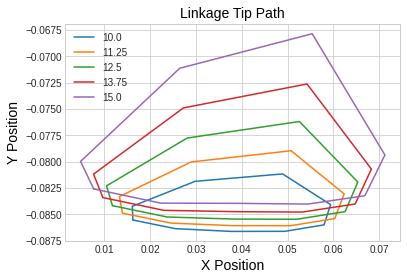

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/8cecc26025e1209e8aae2acb'
configDef = 'Crank_Length%3D{}%2Bmm%3BRotation%3D{}%2Bradian'

angles = np.linspace(0,6.28,10)
crankLengths = np.linspace(10,15,5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

plt.style.use('seaborn-whitegrid')
plt.title('Linkage Tip Path', fontdict=font)
plt.xlabel('X Position', fontdict=font)  
plt.ylabel('Y Position', fontdict=font) 

for idx, length in enumerate(crankLengths):
  xPos = []
  yPos = []
  for ang in angles:
    vars = getVariables(url,configDef.format(str(length),str(ang)))
    for var in vars:
      if 'xPos' in var:
        xPos.append(float(var['xPos'].strip("*meters")))
      elif 'yPos' in var:
        yPos.append(-1*float(var['yPos'].strip("*meters")))

  plt.plot(xPos, yPos,label=str(length));

legend = plt.legend()

### Suspension Analysis

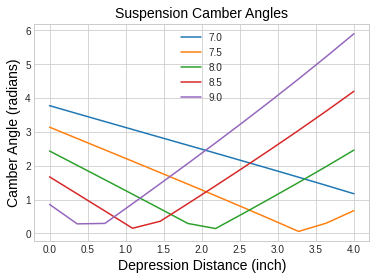

In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/58676b711591dadf9284e2ab'
configDef = 'suspensionDepression%3D{}%2Bin%3BuprightLength%3D{}%2Bin'

suspensionDepression = np.linspace(0,4,12)
uprightLength = np.linspace(7,9,5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

plt.style.use('seaborn-whitegrid')
plt.title('Suspension Camber Angles', fontdict=font)
plt.xlabel('Depression Distance (inch)', fontdict=font)  
plt.ylabel('Camber Angle (radians)', fontdict=font) 

for idx, length in enumerate(uprightLength):
  camberAngles = []
  for depressionDistance in suspensionDepression:
    var = getVariableValue(url,configDef.format(str(depressionDistance),str(length)),'camber')
    camberAngles.append(float(var.strip("*radians"))*180/3.1415)

  plt.plot(suspensionDepression, camberAngles,label=str(length));

legend = plt.legend()

### Bike Analysis


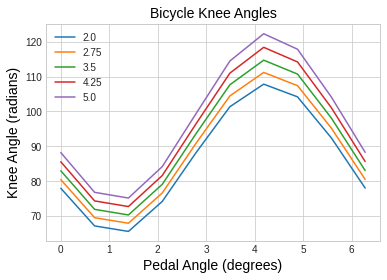

In [28]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://cad.onshape.com/documents/0327fbe843fb3df3c9cb7574/w/fb7116dab9e3f9e3cbbf9534/e/eb5cf1e9ef047a1c7059bfb5'
configDef = 'rotationAngle%3D{}%2Bradian%3BseatHeight%3D{}%2Bin'

angles = np.linspace(0,6.28,10)
seatHeight = np.linspace(2,5,5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

plt.style.use('seaborn-whitegrid')
plt.title('Bicycle Knee Angles', fontdict=font)
plt.xlabel('Pedal Angle (degrees)', fontdict=font)  
plt.ylabel('Knee Angle (radians)', fontdict=font) 

for idx, length in enumerate(seatHeight):
  kneeAngles = []
  for ang in angles:
    var = getVariableValue(url,configDef.format(str(ang),str(length)),'kneeAngle')
    kneeAngles.append(float(var.strip("*radians"))*180/3.1415)

  plt.plot(angles, kneeAngles,label=str(length));

legend = plt.legend()